## Import packages

In [1]:
from imutils import paths, contours
from skimage import io, measure
from PIL import Image as im, ImageEnhance, ImageOps, ImageFilter, ImageDraw, ImageChops
from scipy.ndimage import interpolation as inter
from matplotlib import pyplot as plt
import cv2 as cv
import sys
import numpy as np
import imutils
from numpy import asarray


## Pre-defined functions

### Connected Component Analysis

In [2]:
def findconnectedcomponents(inv_img, pil_img, orig_img, list):
    labels = measure.label(inv_img, neighbors=8, background=0, connectivity=1)
    mask = np.zeros(inv_img.shape, dtype="uint8")

    for label in np.unique(labels):
        if label == 0:
            continue
        labelMask = np.zeros(inv_img.shape, dtype="uint8")
        labelMask[labels == label] = 255
        mask = cv.add(mask, labelMask)
    
    contours, hierarchy = cv.findContours(mask.copy(),cv.RETR_EXTERNAL,cv.CHAIN_APPROX_SIMPLE)

    hierarchy=hierarchy[0]

    height, width= mask.copy().shape
    min_x, min_y = width, height
    max_x = max_y = 0

    for contour, hier in zip(contours, hierarchy):
        (x,y,w,h) = cv.boundingRect(contour)
        cv.rectangle(orig_img, (x,y), (x+w,y+h), (255, 0, 0), 2)
        list.append(pil_img.crop((x, y, x+w, y+h)))

## Load Image Path

In [3]:
NSTrainPaths = list(paths.list_images("..\\Code\\naturalSceneDataset\\Braille\\images\\train"))

In [4]:
NSTrainPaths

['..\\Code\\naturalSceneDataset\\Braille\\images\\train\\0000000.jpg',
 '..\\Code\\naturalSceneDataset\\Braille\\images\\train\\0000001.jpg',
 '..\\Code\\naturalSceneDataset\\Braille\\images\\train\\0000002.jpg',
 '..\\Code\\naturalSceneDataset\\Braille\\images\\train\\0000003.jpg',
 '..\\Code\\naturalSceneDataset\\Braille\\images\\train\\0000004.jpg',
 '..\\Code\\naturalSceneDataset\\Braille\\images\\train\\0000006.jpg',
 '..\\Code\\naturalSceneDataset\\Braille\\images\\train\\0000007.jpg',
 '..\\Code\\naturalSceneDataset\\Braille\\images\\train\\0000008.jpg',
 '..\\Code\\naturalSceneDataset\\Braille\\images\\train\\0000009.jpg',
 '..\\Code\\naturalSceneDataset\\Braille\\images\\train\\0000010.jpg',
 '..\\Code\\naturalSceneDataset\\Braille\\images\\train\\0000011.jpg',
 '..\\Code\\naturalSceneDataset\\Braille\\images\\train\\0000012.jpg',
 '..\\Code\\naturalSceneDataset\\Braille\\images\\train\\0000013.jpg',
 '..\\Code\\naturalSceneDataset\\Braille\\images\\train\\0000014.jpg',
 '..\\

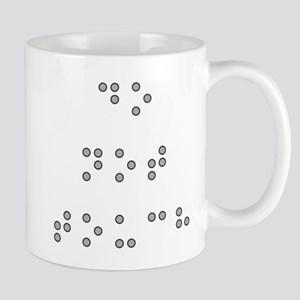

In [5]:
img = im.open(NSTrainPaths[0])
img_np = cv.imread(NSTrainPaths[0])
img

## Preprocessing

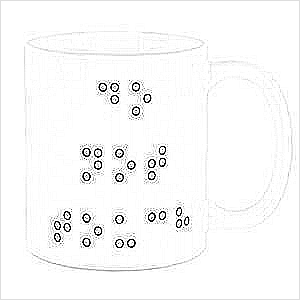

In [6]:
#Highlight text

#convert to grayscale
img = ImageOps.grayscale(img)

#contour
img = img.filter(ImageFilter.CONTOUR) 
img

# #smoothening
# img = img.filter(ImageFilter.SMOOTH) 

# #increase contrast
# enhancer = ImageEnhance.Contrast(img)
# factor = 8 #increase contrast
# img = enhancer.enhance(factor)
# img

#median filter 
# img = img.filter(ImageFilter.MedianFilter(size = 3)) 
# img

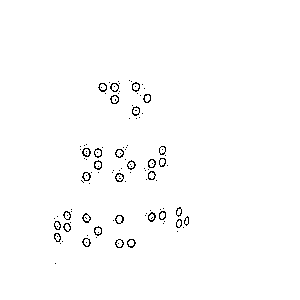

In [7]:
# Threshold
img2 = img.point( lambda p: 255 if p > 110 else 0 )
# To mono
img2 = img2.convert('1')
img2

## Line segmentation

### Horizontal Projection

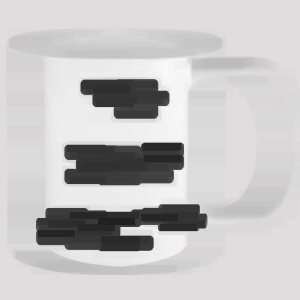

In [8]:
kernel = np.ones((3, 13), np.uint8)
img_erosion = im.fromarray(cv.erode(img_np, kernel, iterations=3))
img_erosion

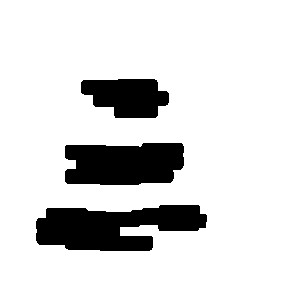

In [9]:
# Threshold
img2 = img_erosion.point( lambda p: 255 if p > 100 else 0 )
# To mono
img2 = img2.convert('1')
img2

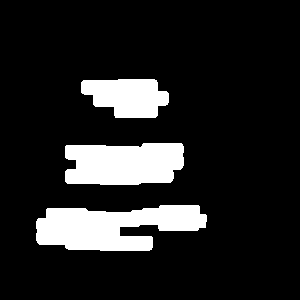

In [10]:
inv_img = ImageChops.invert(img2) 
inv_img

### Segmenting by Analysing Connected Components

In [11]:
lines=[]
inv_img = np.array(inv_img)
findconnectedcomponents(inv_img, img2, img_np, lines)

<ipython-input-2-1c8656564667>:2: UserWarning: The argument 'neighbors' is deprecated and will be removed in scikit-image 0.18, use 'connectivity' instead. For neighbors=8, use connectivity=2
  labels = measure.label(inv_img, neighbors=8, background=0, connectivity=1)


In [12]:
cv.imshow("Image", img_np)
cv.waitKey(0)

-1

In [13]:
for i in lines:
    i.show()

## Word Segmentation

In [14]:
# kernel = np.ones((3, 3), np.uint8)

# for i in lines:
#     kernel = np.ones((3, 13), np.uint8)
#     img_erosion = im.fromarray(cv.erode(np.array(i), kernel, iterations=1))
#     img_erosion.show()
#     i.show()